# Component Labelling Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dim = (20, 20)
img = np.zeros(dim).astype(int)

# shape creation
img[3:10, 2:4] = 1
img[8:10, 2:10] = 1
img[3:10, 9:10] = 1

img[12:14, 11:13] = 1

img[15:19, 15:18] = 1

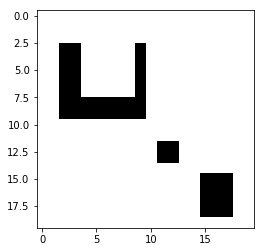

In [3]:
plt.imshow(img, cmap="Greys")

In [4]:
def component_labelling(inputimp):
    color_map = {}
    label = 1
    
    img = inputimp.copy()
    
    def up(i, j):
        if (i == 0):
            return 0
        else:
            return img[i - 1][j]
        
    def left(i, j):
        if (j == 0):
            return 0
        else:
            return img[i][j - 1]
    
    # First
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            if img[i][j] == 0:
                continue
            # new encounter
            if (up(i, j) == 0 and left(i, j) == 0):
                img[i][j] = label
                label += 1
            # top touch
            elif (up(i, j) != 0 and left(i, j) == 0):
                img[i][j] = img[i - 1][j]
            # left touch
            elif (up(i, j) == 0 and left(i, j) != 0):
                img[i][j] = img[i][j - 1]
            # both touch
            else:
            #    if (a != b)
                a = img[i - 1][j]
                b = img[i][j - 1]
                if (a != b):
                    a, b = min(a, b),max(a, b)
                    color_map[b] = a # precomputation for second pass
                img[i][j] = a
    
    # Second
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            p = img[i][j]
            
            if p in color_map.keys():
                img[i][j] = color_map[p]
    
    return img

In [5]:
img = component_labelling(img)

In [6]:
color = np.zeros(img.shape + (3,)).astype(int)
colors = { 0: [255, 255, 255] }

for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            val = img[i][j]
            
            if val in colors.keys():
                color[i][j]  = colors[val]
            else:
                colors[val] = np.random.randint(0, 255, 3)
                color[i][j]  = colors[val]

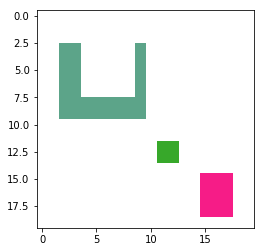

In [7]:
plt.imshow(color)